# Градиентный спукт

- простейшую выпуклую функцию

In [33]:
import numpy as np
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

- Определим функцию, которая вычислит градиент:

In [34]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

- Также запрограммируем простейший вариант для градиентного спуска:

In [35]:
def grad_descend(grad, step_size=1, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

- Напишем функцию, которая будет строить график:

In [36]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

- Визуализируем и получим следующее движение градиентного спуска к минимуму:

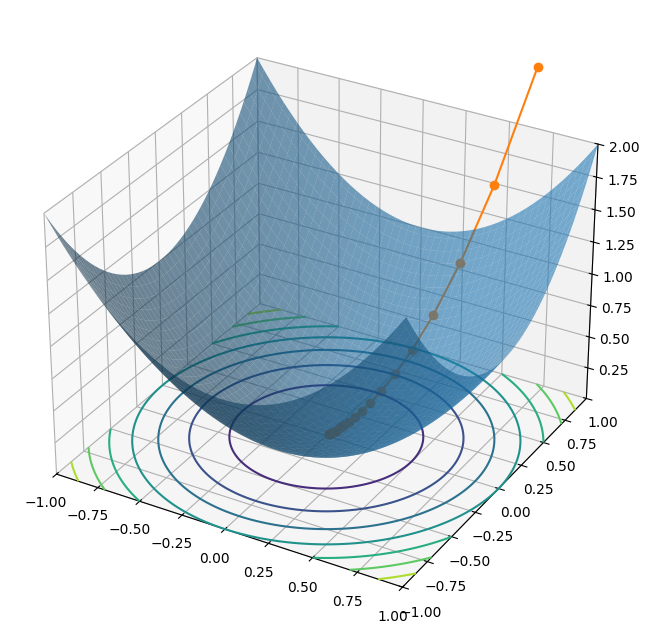

In [39]:
#import matplotlib.pyplot as plt
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [58]:
from sympy import diff, symbols
x, y, z = symbols('x, y, z', real=True)

f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*x + 9*z**2 + 4*x + 8*y - 20*z

x_diff = diff(f, x)
y_diff = diff(f, y)
z_diff = diff(f, z)
print(x_diff)
print(y_diff)
print(z_diff)

xyz = {x:0, y:0, z:0}
alpha = 0.25

x_point = xyz[x] - alpha * x_diff.subs(xyz)
y_point = xyz[y] - alpha * y_diff.subs(xyz)
z_point = xyz[z] - alpha * z_diff.subs(xyz)
print(x_point)
print(y_point)
print(z_point)

4*x - 8*y - 4*z + 4
-8*x + 8*y + 8
-4*x + 18*z - 20
-1.00000000000000
-2.00000000000000
5.00000000000000


In [49]:
x = 0
y = 0
z = 0

x_point = x_diff.subs({x:0, y:0, z:0})

print(x_point)

4*x - 8*y - 4*z + 4
